## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # import kmc

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [23]:
df = pd.read_csv('./data/airbnb_hw.csv')
df.head(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [24]:
# create a new df of the vars we need
df2 = df.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]

# clean price
print(df2["Price"])
df2['Price'] = df2['Price'].str.replace(",","") # remove the commas
df2['Price'] = pd.to_numeric(df2['Price'])
print(df2["Price"])

# clean beds
print(df2["Beds"].unique())
df2['Beds'] = pd.to_numeric(df2["Beds"])
df2['Beds'] = df2['Beds'].fillna(1) # fill nan beds with 1...

# clean number of reviews
print(df2["Number Of Reviews"].unique()) # this looks fine already

# clean review scores rating
print(df2["Review Scores Rating"].unique())
df2["Review Scores Rating"] = pd.to_numeric(df2["Review Scores Rating"])

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: object
0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: int64
[ 1.  3.  2.  4.  5. nan  6. 10.  7.  8. 12.  0. 16.  9. 11.]
[  0   1  39   4   9  80  95  23  14 120  81  17  32  52   3 171  16  19
   2  28  62   6   5  12  40  47  13  35  34  68  42   7  41  15  21   8
  10  29 112  25 132  51 156  30  98  24  74  20 188 221  57  11 242  67
 118  60 136 119  79 106  43  91 105  96 141 146  63  58  18 150  38  55
  89  46  77  48  36  69  26  73  53 165  92  87 108 109  50 127  88  83
 184 179  22  31  82  27 123 247 190 257 217  85 103 157 102  56 125 115
  49  97  54  65  90  44  33 100  37 107 114 116  61 104  71  75 145  84
  93 110 172 148 131 154  86  64  76 129  45 180 140  78 2

In [25]:
df2.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [26]:
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

# preprocess the data
df2 = df2.dropna() # need to drop NaNs here
X = df2.copy()
X = X.apply(maxmin) # normalize

# drop because this is what we are predicting
X = X.drop('Price',axis=1)

X.head()

,Beds,Number Of Reviews,Review Scores Rating
4,0.1875,0.148438,0.950
5,0.0625,0.011719,1.000
6,0.0625,0.031250,1.000
7,0.0625,0.308594,0.925
8,0.1250,0.367188,0.875


3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [27]:
model = KMeans(n_clusters=6,max_iter=300,n_init=10,random_state=0)
model=model.fit(X)
# predict values
# X['g_hat']=model.predict(X)
X['cluster'] = model.labels_ # shows the cluster number
X.describe()

,Beds,Number Of Reviews,Review Scores Rating,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.149718
std,0.065205,0.094954,0.110630,1.401749
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,4.000000
max,1.000000,1.000000,1.000000,5.000000


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

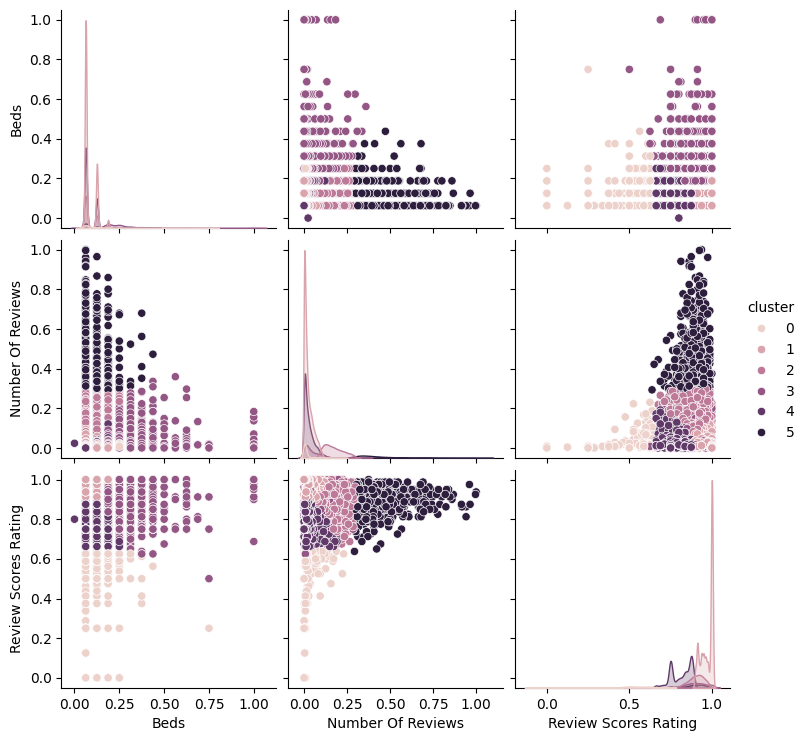

In [28]:
sns.pairplot(data=X,hue='cluster')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [29]:
df2['cluster'] = model.labels_
df2.loc[:,['Price','cluster']].groupby('cluster').describe()

Price                                                             
           count        mean         std   min    25%    50%     75%      max
cluster                                                                      
0          632.0  133.587025  215.505565  25.0   65.0   99.0  151.25   5000.0
1        10529.0  152.287682  147.227153  10.0   85.0  130.0  190.00  10000.0
2         3022.0  141.489411   83.936285  22.0   87.0  125.0  175.00   1000.0
3         1626.0  293.528905  262.934691  27.0  150.0  229.0  350.00   4500.0
4         5554.0  131.631797  102.758887  20.0   75.0  110.0  169.00   5000.0
5          792.0  133.224747   83.088608  27.0   80.0  110.0  167.50    875.0

Cluster 3 has the highest rental prices, on average at $293 per night. Clusters 0, 4, and 5 have lower average rental prices, close to $130/night. Cluster 2 is at ~$140/night, and cluster 1 is at ~$150/night. This trend likely isn't explained by outliers because cluster 3 is more expensive at each of hte percentiles shown.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

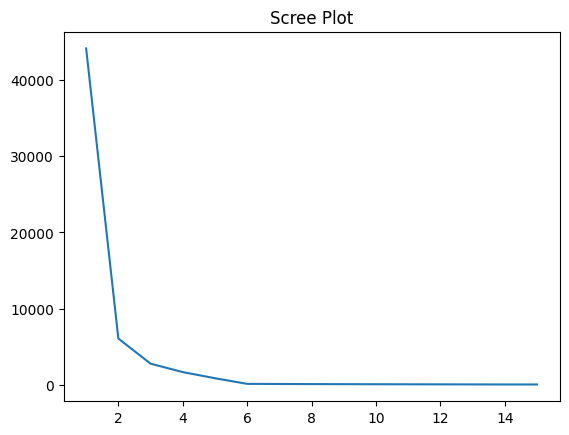

In [30]:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    model = KMeans(n_clusters=k+1,max_iter=300,n_init=10,random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_ # sum of squared error for k in SSE vector

sns.lineplot(x=k_grid,y=SSE).set_title('Scree Plot')

Based on the "elbow" in the scree plot, I will choose a k of 3

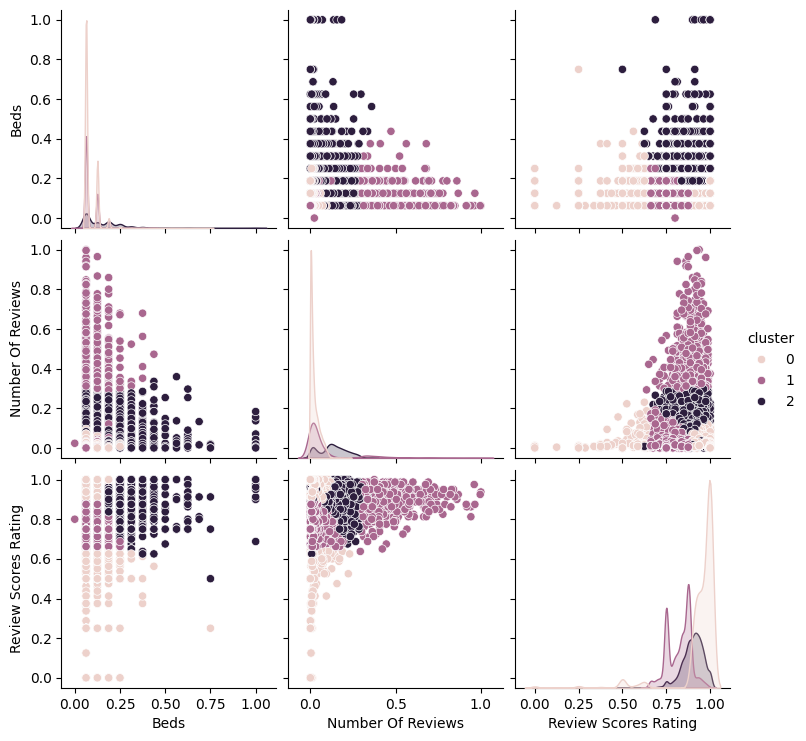

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        11161.0  151.228743  151.963553  10.0  85.0  129.0  190.0  10000.0
1         6346.0  131.830602  100.510035  20.0  75.0  110.0  169.0   5000.0
2         4648.0  194.677065  184.430237  22.0  99.0  150.0  225.0   4500.0

In [31]:
model = KMeans(n_clusters=3,max_iter=300,n_init=10,random_state=0)
model=model.fit(X)

X['cluster'] = model.labels_ # shows the cluster number
sns.pairplot(data=X,hue='cluster')
plt.show()

df2['cluster'] = model.labels_
df2.loc[:,['Price','cluster']].groupby('cluster').describe()

In [34]:
print(df2.loc[:,['Review Scores Rating','cluster']].groupby('cluster').describe())
print(df2.loc[:,['Number Of Reviews','cluster']].groupby('cluster').describe())

        Review Scores Rating                                                \
                       count       mean       std   min   25%   50%    75%   
cluster                                                                      
0                    11161.0  95.456411  9.847616  20.0  95.0  99.0  100.0   
1                     6346.0  85.892846  5.313781  71.0  80.0  87.0   90.0   
2                     4648.0  92.006239  4.727815  60.0  89.0  93.0   95.0   

                
           max  
cluster         
0        100.0  
1        100.0  
2        100.0  
        Number Of Reviews                                                    
                    count       mean        std  min   25%   50%   75%    max
cluster                                                                      
0                 11161.0   6.816325   6.597188  1.0   2.0   4.0  10.0   60.0
1                  6346.0  20.889537  35.966510  1.0   3.0   7.0  17.0  257.0
2                  4648.0  33.785714  1

Cluster 2 has the highest prices on average, at $195/night. Cluster 0 is at ~$150/night, and cluster 1 is at ~$130/night. Cluster 2 has higher prices at each percentile than the other clusters. Cluster 2 has the most reviews and cluster 0 has the least reviews. The average reviews are similar between clusters 0 and 2.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```



In [11]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

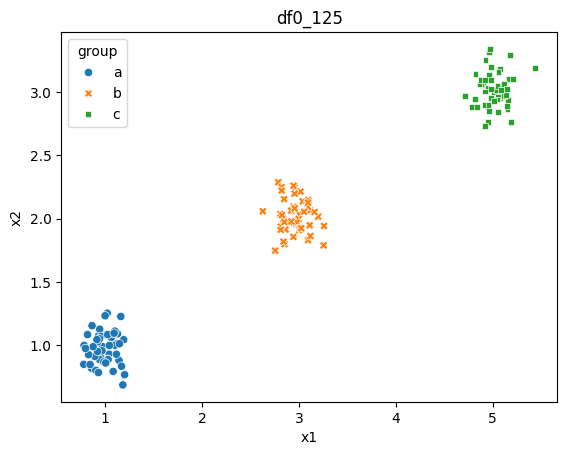

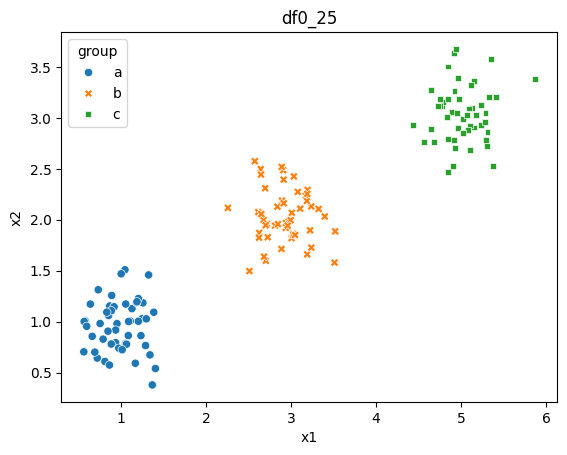

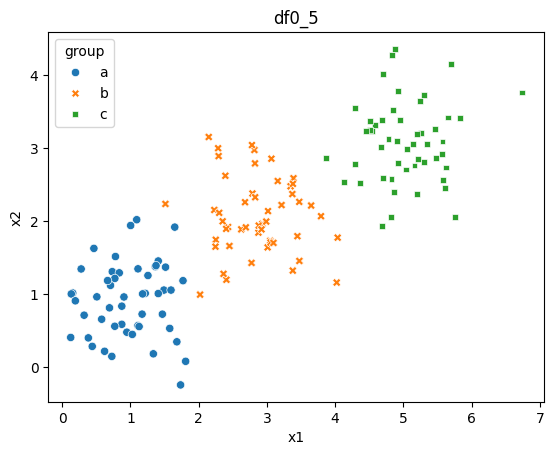

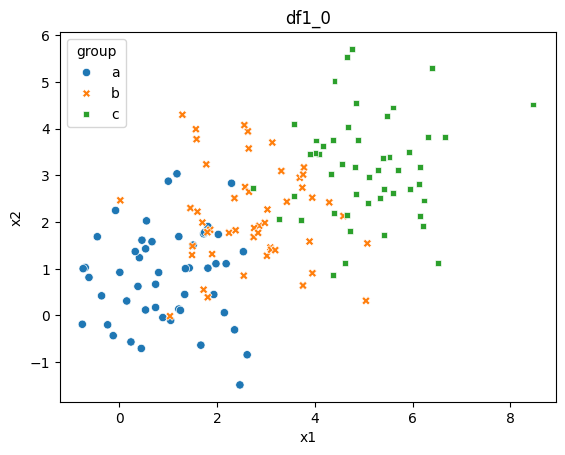

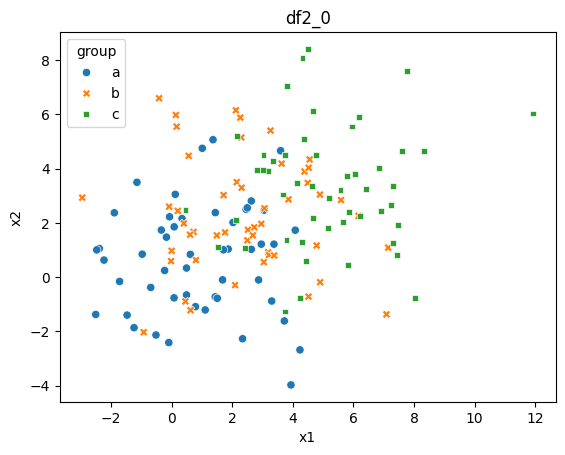

In [12]:
sns.scatterplot(data=df0_125,x='x1',y='x2',hue='group',style='group')
plt.title("df0_125")
plt.show()

sns.scatterplot(data=df0_25,x='x1',y='x2',hue='group',style='group')
plt.title("df0_25")
plt.show()

sns.scatterplot(data=df0_5,x='x1',y='x2',hue='group',style='group')
plt.title("df0_5")
plt.show()

sns.scatterplot(data=df1_0,x='x1',y='x2',hue='group',style='group')
plt.title("df1_0")
plt.show()

sns.scatterplot(data=df2_0,x='x1',y='x2',hue='group',style='group')
plt.title("df2_0")
plt.show()

As the noise increases, the clusters become less visually distinct. The groups become closer together and begin to overlap in the x1-x2 plane. After a noise level of 0.5, we can no longer effectively distinguish points in different clusters. For noise=2, there is almost no separation between the groups.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.

In [13]:
df0_125.head(2)

,x1,x2,group
0,0.781279,0.851498,a
1,1.042835,0.931282,a


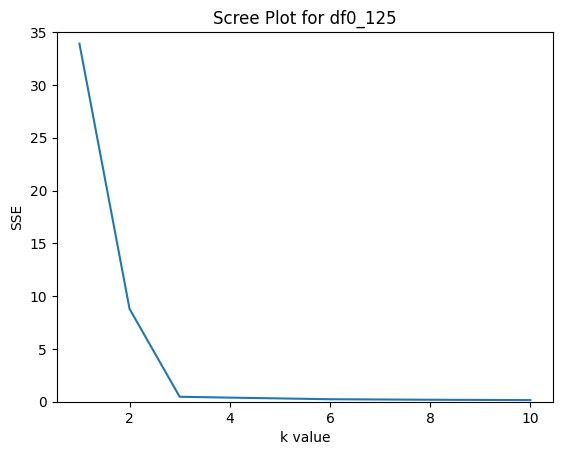

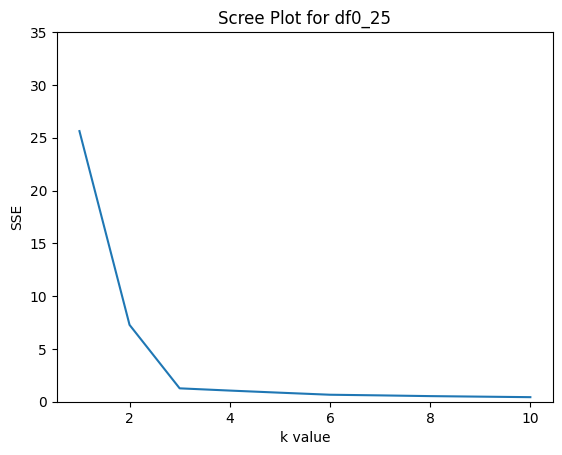

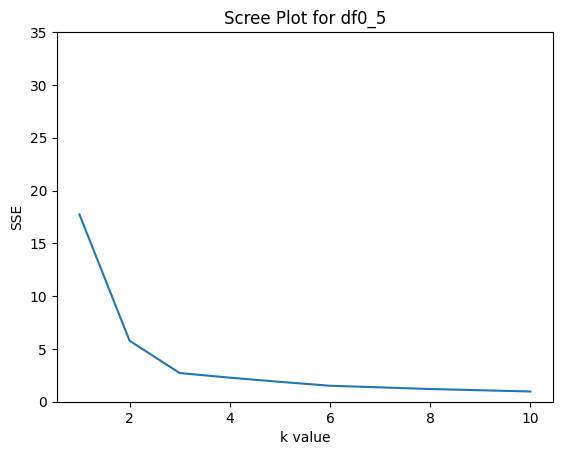

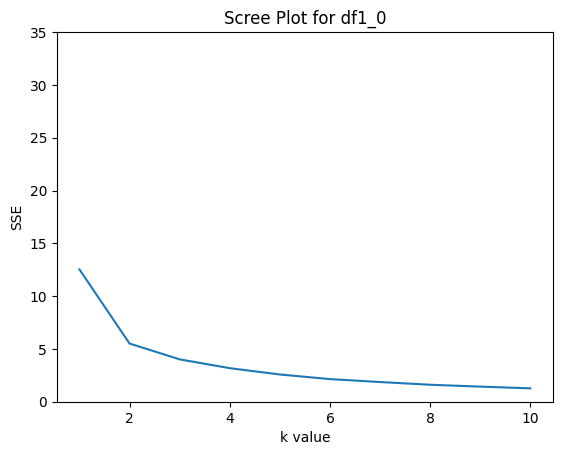

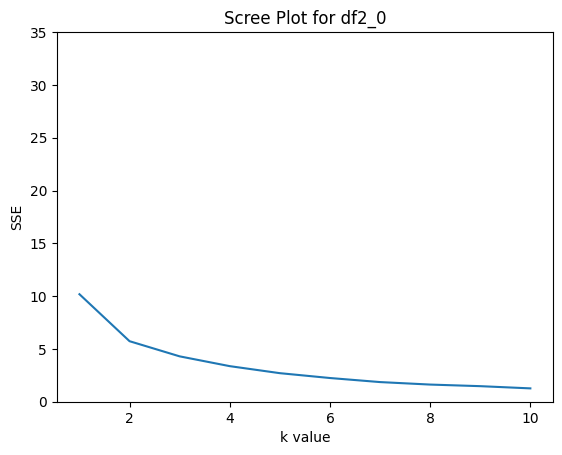

In [20]:
## df0_125
# select data to cluster
X = df0_125.loc[:,['x1','x2']]
X = X.apply(maxmin)
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1,max_iter=300,n_init=10,random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_ # record some of squared error

scree_plot = sns.lineplot(x=k_grid,y=SSE).set_title('Scree Plot for df0_125')
plt.ylim(0,35)
plt.xlabel("k value")
plt.ylabel("SSE")
plt.show()

# df0_25
X = df0_25.loc[:,['x1','x2']]
X = X.apply(maxmin)
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1,max_iter=300,n_init=10,random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_ # record some of squared error

scree_plot = sns.lineplot(x=k_grid,y=SSE).set_title('Scree Plot for df0_25')
plt.ylim(0,35)
plt.xlabel("k value")
plt.ylabel("SSE")
plt.show()

# df0_5
X = df0_5.loc[:,['x1','x2']]
X = X.apply(maxmin)
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1,max_iter=300,n_init=10,random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_ # record some of squared error

scree_plot = sns.lineplot(x=k_grid,y=SSE).set_title('Scree Plot for df0_5')
plt.ylim(0,35)
plt.xlabel("k value")
plt.ylabel("SSE")
plt.show()

# df1_0
X = df1_0.loc[:,['x1','x2']]
X = X.apply(maxmin)
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1,max_iter=300,n_init=10,random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_ # record some of squared error

scree_plot = sns.lineplot(x=k_grid,y=SSE).set_title('Scree Plot for df1_0')
plt.ylim(0,35)
plt.xlabel("k value")
plt.ylabel("SSE")
plt.show()

# df2_0
X = df2_0.loc[:,['x1','x2']]
X = X.apply(maxmin)
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1,max_iter=300,n_init=10,random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_ # record some of squared error

scree_plot = sns.lineplot(x=k_grid,y=SSE).set_title('Scree Plot for df2_0')
plt.ylim(0,35)
plt.xlabel("k value")
plt.ylabel("SSE")
plt.show()


The datasets with the least noise have a clear elbow in their scree plot, while the noisy datasets do not. For example, for noise level of 0.125, there is a steep decrease in SSE between k = 2 and 3 and constant SSE around zero after, while for a noise level of 2.0, SSE continues to decrease from k = 1 to 10. The noiser data have a less clear elbow plot that makes it more difficult to choose the appropriate value for k. 

4. Explain the intuition of the elbow, using this numerical simulation as an example.

For separated and distinct groups, selecting a certain number of clusters that maximizes the distance between groups shows a large benefit because we have a large decrease in the SSE. In the scatter plots with a noise level of under 0.5, we see three visually distinct groups, with large separation in the x1-x2 plane. In the corresponding scree plots, there is a large decrease in SSE moving from k=2 to k=3 and little decrease in SSE after. As the noise increases, there is less visual separation between the groups in the x1-x2 plane, and eventually, it is not possible to determine their group, particularly for points in the center. Due to this, clustering is not necessarily stable. As such, we do not see an obvious elbow in the plot, but rather a continuous decrease in SSE as k increases.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.



In [ ]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?

3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).


4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  


5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?


6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?